# A Data Analysis on Seattle Airbnb Prices

### Step 1: Business Understanding

The problem I want to take a look at in this analysis is which features are responsible for driving the price of an Airbnb accommodation in Seattle and whether there are some trends that can be used to make more informed decisions aka finding the best value Airbnb accommodations. For that reason i thought of three questions I want to answer using the data that was found on Kaggle.

#### Question 1: 
Are there any seasonal fluctuations regarding the price of an accomodation, for example is the summer more expensive than the winter?

#### Question 2: 
Does the neighborhood have an impact on the price of an accomodation?

#### Question 3: 
Can we make a prediction on the price using different listing features? 

### Step 2: Data Understanding

In this step I am going to take a inital look at the data that is given and load the necessary libraries.

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

sns.set_style("darkgrid")
%matplotlib inline

#### Gather: All the data can be found on Kaggle https://www.kaggle.com/datasets/airbnb/seattle

In [2]:
#load data 
df_calendar = pd.read_csv("calendar.csv")
df_listings = pd.read_csv("listings.csv")
df_reviews = pd.read_csv("reviews.csv")

#### Assess: In the following part I will assess the data using built in functions like info(), describe() and head() to get a first feeling for the data

In [3]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [8]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### Step 3: Data Preparation & Cleaning 

In this step I am going to clean and modify the data that I need to answer my questions later on. I am looking for missing values, wrong data types or features that are not necessary and could be dropped. 

#### Question 1

In [126]:
# take a look at the data again, there seem to be some missing values in the price column, also the data type for price doesn't seems right
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [132]:
def price_float_converter(df):
    """
    Converts the price column into a float number, so that it can be used for analysis
    
    Parameters: 
    df (dataframe) = Dataframe that you want to have the price column converted
    
    Return: 
    df["price"] = returns the price column as a float number, stripped of $, replaced , with nothing  
    """
    
    df["price"] = df["price"].str.strip("$")
    df["price"] = [float(str(i).replace(",", "")) for i in df["price"]]
    return df["price"]

In [131]:
# first convert price to a float value
df_calendar_copy = df_calendar.copy()
price_float_converter(df_calendar_copy)

0          85.0
1          85.0
2           NaN
3           NaN
4           NaN
           ... 
1393565     NaN
1393566     NaN
1393567     NaN
1393568     NaN
1393569     NaN
Name: price, Length: 1393570, dtype: float64

In [129]:
# seems like the conversion worked 
df_calendar_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


In [119]:
# let's see if we can find a trend in the missing values: seems like all non-available dates have a NaN value 
df_calendar_copy.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [120]:
def missing_values(df):
    """
    Computes the percentage of missing values for each column in the dataframe
    
    Parameters: 
    df (dataframe) = dataframe in which you are looking for missing values 
    
    Return: 
    percentage (float) = returns the missing values as percentage numbers
    """
        
    percentage = df.isna().sum()/df.shape[0]
    return percentage 

In [121]:
missing_values(df_calendar_copy)

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

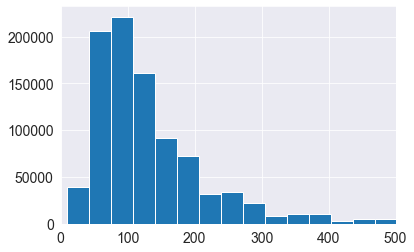

In [122]:
# price seems to be right skewed
plt.xlim((0, 500))
plt.hist(data=df_calendar_copy, x="price", bins=50);

#### Missing values:
    - I don't want to drop them since there are about 33% missing which is just too much for my liking.
    - Also it seems that they are missing on purpose since the accommodations weren't available during that day.
    - This article https://medium.com/analytics-vidhya/appropriate-ways-to-treat-missing-values-f82f00edd9be mentions using the median for skewed data is preferable.

In [111]:
df_calendar_copy["price"].fillna(df_calendar_copy["price"].median(), inplace=True)

In [113]:
#looks good and clean
df_calendar_clean = df_calendar_copy
df_calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       1393570 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


#### Question 2

In [134]:
#First let's make a new data set using only features that are interesting to us 
df_listings_new = df_listings[["neighbourhood_group_cleansed", "price"]]
df_listings_new.head()

,neighbourhood_group_cleansed,price
0,Queen Anne,$85.00
1,Queen Anne,$150.00
2,Queen Anne,$975.00
3,Queen Anne,$100.00
4,Queen Anne,$450.00


In [135]:
# no misising values, but the data type of the price column is wrong, should a float
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   neighbourhood_group_cleansed  3818 non-null   object
 1   price                         3818 non-null   object
dtypes: object(2)
memory usage: 59.8+ KB


In [136]:
# convert the price to a float value
price_float_converter(df_listings_new)

<ipython-input-132-02b70248c8b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].str.strip("$")
<ipython-input-132-02b70248c8b2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = [float(str(i).replace(",", "")) for i in df["price"]]


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [137]:
#looks good and clean
df_listings_clean = df_listings_new
df_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  3818 non-null   object 
 1   price                         3818 non-null   float64
dtypes: float64(1), object(1)
memory usage: 59.8+ KB


### Question 3

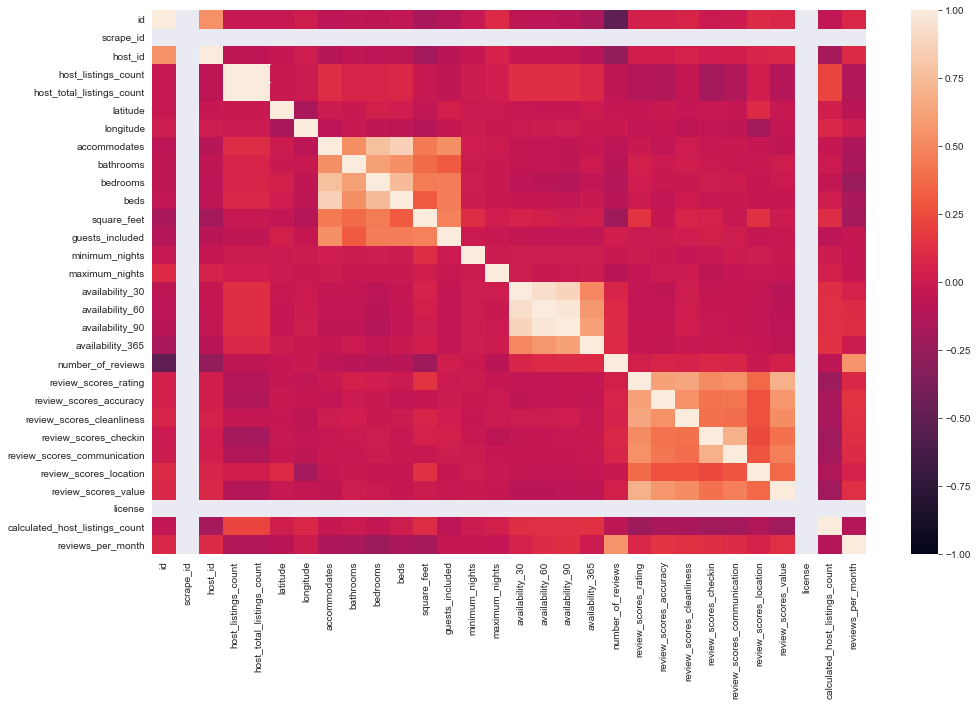

In [4]:
# first let's take a look at the correlations to figure out which features to use 
plt.figure(figsize=(16, 10))
sns.heatmap(df_listings.corr(), vmin=-1, vmax=1);

In [145]:
# there seem to be 3 hotspots around the accommodation features, the availability and the review scores, let's make a subset
df_listings_ml = df_listings[["accommodates", "bathrooms", "bedrooms", "beds", "square_feet", "guests_included", 
                              "availability_30", "availability_60", "availability_90", "availability_365", 
                              "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                              "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                              "review_scores_value", "price"]]
df_listings_ml.head()

,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,4,1.0,1.0,1.0,NaN,2,14,41,71,346,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00
1,4,1.0,1.0,1.0,NaN,1,13,13,16,291,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00
2,11,4.5,5.0,7.0,NaN,10,1,6,17,220,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00
3,3,1.0,0.0,2.0,NaN,1,0,0,0,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100.00
4,6,2.0,3.0,3.0,NaN,6,30,60,90,365,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00


In [146]:
df_listings_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 3818 non-null   int64  
 1   bathrooms                    3802 non-null   float64
 2   bedrooms                     3812 non-null   float64
 3   beds                         3817 non-null   float64
 4   square_feet                  97 non-null     float64
 5   guests_included              3818 non-null   int64  
 6   availability_30              3818 non-null   int64  
 7   availability_60              3818 non-null   int64  
 8   availability_90              3818 non-null   int64  
 9   availability_365             3818 non-null   int64  
 10  review_scores_rating         3171 non-null   float64
 11  review_scores_accuracy       3160 non-null   float64
 12  review_scores_cleanliness    3165 non-null   float64
 13  review_scores_chec

In [147]:
# convert the price to a float value
price_float_converter(df_listings_ml)

<ipython-input-132-02b70248c8b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].str.strip("$")
<ipython-input-132-02b70248c8b2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = [float(str(i).replace(",", "")) for i in df["price"]]


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [148]:
# percentage of missing values
missing_values(df_listings_ml)

accommodates                   0.000000
bathrooms                      0.004191
bedrooms                       0.001572
beds                           0.000262
square_feet                    0.974594
guests_included                0.000000
availability_30                0.000000
availability_60                0.000000
availability_90                0.000000
availability_365               0.000000
review_scores_rating           0.169460
review_scores_accuracy         0.172342
review_scores_cleanliness      0.171032
review_scores_checkin          0.172342
review_scores_communication    0.170508
review_scores_location         0.171556
review_scores_value            0.171818
price                          0.000000
dtype: float64

In [149]:
# drop square_feet because it is missing 97% since there is hardly any information in that column
df_listings_ml.drop(["square_feet"], axis=1, inplace=True);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [150]:
df_listings_ml.describe()

,accommodates,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000
mean,3.349398,1.259469,1.307712,1.735394,1.672603,16.786276,36.814825,58.082504,244.772656,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,127.976166
std,1.977599,0.590369,0.883395,1.139480,1.311040,12.173637,23.337541,34.063845,126.772526,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,90.250022
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,20.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,13.000000,28.000000,124.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,75.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000,20.000000,46.000000,73.000000,308.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000
75%,4.000000,1.000000,2.000000,2.000000,2.000000,30.000000,59.000000,89.000000,360.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000
max,16.000000,8.000000,7.000000,15.000000,15.000000,30.000000,60.000000,90.000000,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1000.000000


#### Missing values:
    - Most missing values are in the review columns, probably because customers just didn't write any.
    - Since it's a quite small data set already. I don't want to drop more rows.
    - I think the best way to handle them is in imputing them with the mean value, since it won't skew the data.

In [151]:
# looks good and clean
df_listings_ml.fillna(df_listings_ml.mean(), inplace=True)
df_listings_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 3818 non-null   int64  
 1   bathrooms                    3818 non-null   float64
 2   bedrooms                     3818 non-null   float64
 3   beds                         3818 non-null   float64
 4   guests_included              3818 non-null   int64  
 5   availability_30              3818 non-null   int64  
 6   availability_60              3818 non-null   int64  
 7   availability_90              3818 non-null   int64  
 8   availability_365             3818 non-null   int64  
 9   review_scores_rating         3818 non-null   float64
 10  review_scores_accuracy       3818 non-null   float64
 11  review_scores_cleanliness    3818 non-null   float64
 12  review_scores_checkin        3818 non-null   float64
 13  review_scores_comm

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Step 4: Evaluation and Modeling 

In this step I am going to evaluate the results for each questions that I posed in the beginning, using visualizations for easier understanding. 

For questions 3 I also need to set up a linear regression model.

####  Analyze Question 1: 
Are there any seasonal fluctuations regarding the price of an accomodation, for example is the summer more expensive than the winter?

In [155]:
df_calendar_clean.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,109.0
3,241032,2016-01-07,f,109.0
4,241032,2016-01-08,f,109.0


In [156]:
#add an additional column for the month
df_calendar_clean['month'] = pd.DatetimeIndex(df_calendar_clean['date']).month
df_calendar_clean.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,109.0,1
3,241032,2016-01-07,f,109.0,1
4,241032,2016-01-08,f,109.0,1


In [157]:
#group by month and get the average price 
calendar_grouped = df_calendar_clean.groupby("month")["price"].mean()

#### Visualize Question 1

In [161]:
def bar_plot(data, title, xlabel, ylabel):
    """
    Plots a bar plot with a few standard settings
    
    Parameters:
    data (list) = data you want to get plotted, for example the mean price per month on Airbnb accommodations
    title (string) = title of the plot
    xlabel (string) = x-axis label
    ylabel (string) = y-axis label
    
    Return:
    plt.bar = A bar plot 
    """
    
    plt.figure(figsize=(12,6))
    plt.rcParams.update({'font.size': 14})
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return plt.bar(data.index, data);

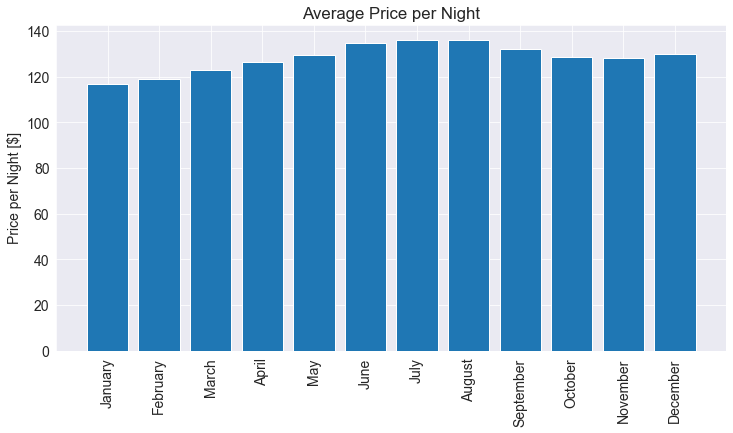

In [163]:
#plot the findings using a bar plot
bar_plot(calendar_grouped, "Average Price per Night", "", "Price per Night [$]")
ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", 
          "October", "November", "December"]
plt.xticks(ticks, labels);

It seem's that there are indeed some seasonal fluctuations in the price. There is a rise in prices starting in Spring with a peak during July. Summer time in general seems like the most expensive season.

#### Analyze Question 2:
Does the neighborhood have an impact on the price of the accomodation?

In [164]:
df_listings_clean.head()

,neighbourhood_group_cleansed,price
0,Queen Anne,85.0
1,Queen Anne,150.0
2,Queen Anne,975.0
3,Queen Anne,100.0
4,Queen Anne,450.0


In [165]:
# group by nieghbourhood and get the average price per night
neighbourhood_grouped = df_listings_clean.groupby("neighbourhood_group_cleansed")["price"].mean().sort_values(ascending=False)

#### Visualize Question 2

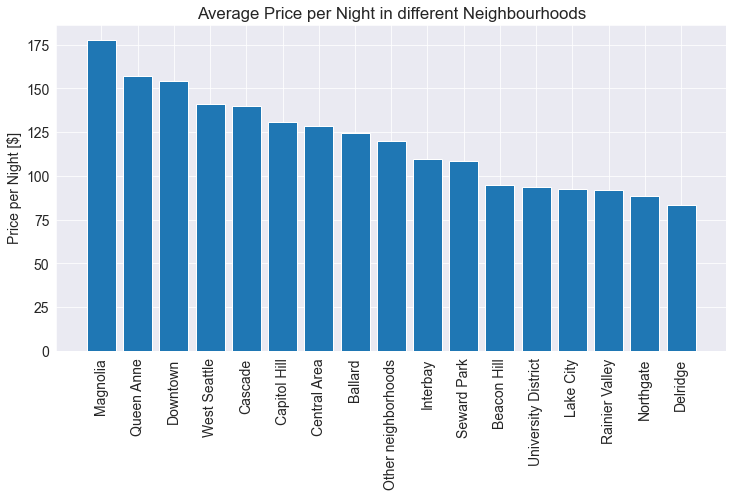

In [167]:
# plot the result
bar_plot(neighbourhood_grouped, "Average Price per Night in different Neighbourhoods", "", "Price per Night [$]");

There is a huge difference in prices in the different neighbourhoods. Magnolia is almost double as expensive on average as Delridge.

#### Analyze & Model Question 3:
Can we make a prediction on the price using different features?

In [13]:
# set features for X and y 
X = df_listings_ml.drop(["price"], axis=1)
y = df_listings_ml["price"]

In [40]:
# train and test split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [41]:
# set up a linear regression model 
lm_model = LinearRegression(normalize=True) 

In [42]:
# fit the model and predict on the test data 
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)

In [43]:
# check the model score 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.5134285127624991 on 1146 values.'

#### Visualize Question 3

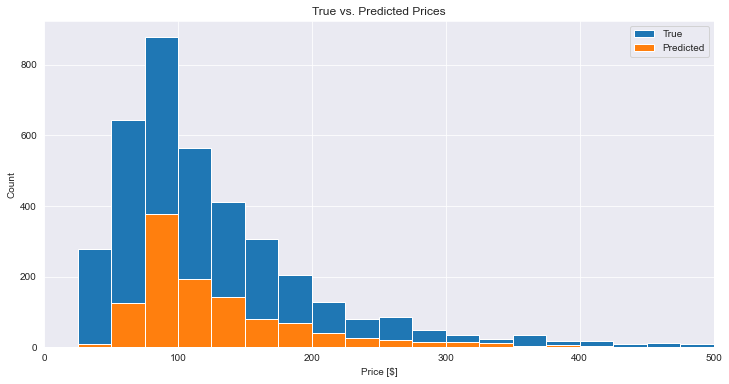

In [52]:
# trying to compare the true prices and the predicted prizes 
plt.figure(figsize=(12,6))
bins = np.arange(0, y.max()+25, 25)
plt.xlim(0, 500)
plt.title("True vs. Predicted Prices")
plt.xlabel("Price [$]")
plt.ylabel("Count")
plt.hist(x=y, bins=bins, label="True")
plt.hist(x=y_test_preds, bins=bins, label="Predicted")
plt.legend();

Despite there being way less predicted values, the overall trend seems to be very similar, with a peak in the same spot. Therefore it seems reasonable to say that a prediction on the price is somewhat possible, given the circumstances. 

### Step 5: Deployment 

The results of this analysis will be used to write a blog post on Medium https://medium.com/@Dennis.Burckhardt/how-to-find-the-cheapest-airbnb-in-seattle-8caa470539d8. Further the model I build for question 3 could be fine tuned and used for prediciting accommodation prices.